# Epidemic simulation
In this demo, we will simulate the spread of an infection and analyze how the network reacts to random failures and targeted attacks. We will examine epidemic properties as a function of the number of nodes removed. 
We will work on two networks: the Erdos-Renyi (random network) and the scale-free (Albert-Barabasi network) networks. 

**Note:** To obtain the same results of the ['report'](url), check to set all the variables equal to those reported in ['set_variables.txt'](url)

First of all, we need to set the variables for the networks and the epidemic simulation. 
We also set a random seed for reproducibility.

In [1]:
# Network parameters
N = 100  # Number of nodes
p = 0.04  # Probability of connection between nodes
k = N * p  # Average degree

# Epidemic parameters
p_t = 0.2  # Transmission probability
p_i = 0.05  # Recovery probability
duration = 50  # Duration of the epidemic
infected_t0 = 1  # Initial number of infected nodes

import numpy as np
import random 

# Reproducibility
seed = 102
random.seed(seed)
np.random.seed(seed)

Now we can create our two networks.

In [2]:
import networkx as nx
erdos_renyi_net = nx.erdos_renyi_graph(N, p, directed=False)
# set k/2 because the graph is undirected
scale_free_net = nx.barabasi_albert_graph(N, int(k/2))

We create epidemic simulations for both the Erdős-Rényi and the scale-free networks using the EpidemicToleranceSimulation class. 
The num_simulations needs to avoid the randomness due to the stochasticity of the epidemic spreading.

In [7]:
# Simulation setup
num_simulations = 100  # Number of simulations for randomness
num_points = 15  # Number of removal points
max_removal_frequency = 0.5

from ..tolerance_simulation import EpidemicToleranceSimulation

# Create epidemic simulations for both networks
ER_epid_sim = EpidemicToleranceSimulation(erdos_renyi_net, p_t, p_i, duration, infected_t0, max_removal_frequency, num_points)
SF_epid_sim = EpidemicToleranceSimulation(scale_free_net, p_t, p_i, duration, infected_t0, max_removal_frequency, num_points)


ImportError: attempted relative import with no known parent package

We calculate how the epidemic features vary under node removals (attacks and errors). 

**Note:** Here we focus on the total number of infected once the epidemic is over; however, in the ['epidemic_functions'](url) module, you can explore additional functions that calculate other epidemic characteristics.

In [4]:
from epidemic_functions import total_infected_percentage
from remotion_functions import error, attack

freq, infected_attack_ER = ER_epid_sim.epidemic_property_vs_removals(total_infected_percentage, attack, num_simulations)
_, infected_attack_SF, = SF_epid_sim.epidemic_property_vs_removals(total_infected_percentage, attack, num_simulations)

freq, infected_error_ER = ER_epid_sim.epidemic_property_vs_removals(total_infected_percentage, error, num_simulations)
_, infected_error_SF = SF_epid_sim.epidemic_property_vs_removals(total_infected_percentage, error, num_simulations)


Finally, we plot the data through the function plot_of_two

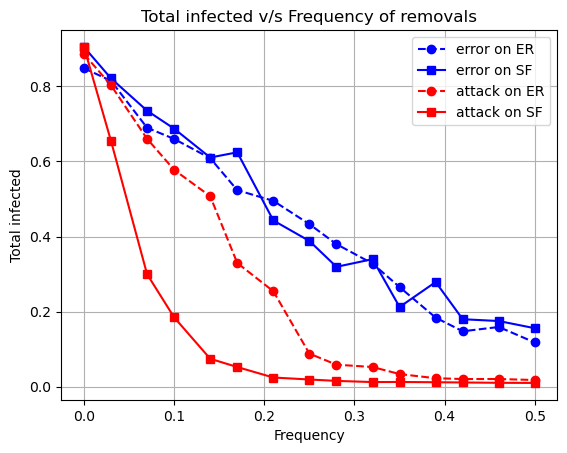

In [5]:
from plot_functions import plot_of_two_data

fig, ax = plot_of_two_data(freq, infected_error_ER, 'error on ER', True, freq, infected_error_SF, label2 = 'error on SF', ylabel='Total infected', xlabel='Frequency', title = 'Total infected v/s Frequency of removals')   
ax.plot(freq, infected_attack_ER, label = 'attack on ER', color='red', marker='o', linestyle ='--')
ax.plot(freq, infected_attack_SF, label = 'attack on SF', color='red', marker='s')
ax.legend()